# BME-336546-C05-Training a classifier

Before we begin, please make sure you have updated the `bm-336546` using `tutorial5.yml`.

## Medical topic
Diabetic retinopathy is the most common diabetic eye disease and a leading cause of blindness in American adults. In the majority of diabetic retinopathy cases, blindness is completely preventable. Patients will need to work closely with their Maine Eye Center diabetic retina eye doctors to contain this disease. The use of medications and daily blood sugar monitoring can make a major impact on containing the worsening of diabetic retinopathy.

The retina is the like the film in a camera; in which it is the light sensing film on the back of the eye that captures the images. In the diabetes disease, sugar (glucose) builds up within blood vessels in the retina and tissues of the body causing glucose to attach to the proteins in the wall. This alters their normal structure and functioning. The vessels eventually get blocked and leak fluid. When they cannot deliver an adequate amount of blood supply to the eye, the eye can generate abnormal new blood vessels. Early diabetic retinopathy usually has no symptoms. However, worsening diabetic retinopathy can lead to visual loss and blindness.
Retinal exudates yellow flecks made up of lipid residues of serious leakage from damaged capillaries.

Diabetes main cause, but also neuroretinitis, retinal vein occlusion,Von Hippel-Lindau Disease, other vascular dysplasias, radiation-induced retinal vasculopathy

<center><img src="images/Diabetic-Retinopathy.png" width=400><center>
<center><img src="images/real diabetic retina.png" width=400><center>

## Dataset
`X`:
* Number of microaneurysms (MA).
* Exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.
* The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI.
* The diameter of the optic disc.

`y`:\
Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

[Data credit](https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set)\
[Paper credit](https://core.ac.uk/download/pdf/161019842.pdf)

## Main ML topic:
Our main ML topic here is still supervised learning. Here we will see how to evaluate our models, compare their performances and indicate their limitaions.

## Our mission
Evaluate linear models of DR detection and compare their perfomances later on to non-linear models.





## Theory reminders

### Regularization

#### The Bias/Variance tradeoff
An important theoretical result of statistics and ML is the fact that a model's generalization error can be expressed as the sum of three very different errors:
> ***Bias:*** This part of generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

> ***Variance:*** This part of generalization error is due to the Model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

> ***Irreducible error:*** This part is due to the noisiness of the data itself or the lack of representative model in our hypotheses class. The only way to partially reduce this error (only in the aspect of noise) is to clean up the data (e.g. fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model's complexity will typically increases its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called **tradeoff**.

<center><img src="images/u_o_fitting class.png" width="450"><center>

<center><img src="images/u_o_fitting regression.png" width="600"><center>

Mostly, our cost functions alone are at high risk of overfitting since they only aim to fit the model to the data. In order to avoid this situation we can constrain our optimization problem to some smaller set of possible solutions by introducing a *regularization term* $E(w)$. The model parameters should now converge to a solution that balances the two terms. Thus, in our case the new cost function would look like this:

$$\begin{equation}
J(W) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n_y}\mathbb{1}^{T}\{y^{(i)}=k\}\ln(a_{ik}) + E(W)
\label{eq: regularization} \tag{7}
\end{equation}$$

where the regularization term mostly consists of a variation of the $\ell_p$ norm which is defined on a vector $w$ as its p-norm: $||w||_p=({\sum_{j=1}^{n_x}|w_j|^p})^{1/p}$. In total our cost function is defied as:

$$\begin{equation}
J(W) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n_y}\mathbb{1}^{T}\{y^{(i)}=k\}\ln(a_{ik}) + \lambda\sum_{k=1}^{n_y}||W^{(k)}||^p_p
\label{eq: lp} \tag{8}
\end{equation}$$

where $W^{(k)}$ is the $k^{th}$ row of the matrix $W$ and $\lambda$ is a hyperparameter that sets the penalization. 
The higher $\lambda$ is, the higher importance of the regularization term is, and thus the model will be pushed towards lower weights in order to minimize the cost function $J$. \
When $p=2$ the regularization is known as *Ridge regularization* and when $p=1$ it is known as *Lasso regularization*. Regularization can also be performed in a regression task, where it is supposed to achieve the optimal weights values of the **chosen** order of the polynomial model for instance. Thus the order of the polynomial model is another hyperparameter. Here is a graphical interpretation in the case of regularized **regression** in $2D$:
<center><img src="images/ridge_lasso.PNG" width="380"><center>


---
<span style="color:red">***Question:***</span> *Which image represents Ridge regularization and which one is Lassso?*

---


The most important thing in learning is the *capability of generalization*. In general, we **fit** our model to the **training** set and once fitted, we **apply** the fitted model on the **testing** set which is a set that our model has never "seen" before. Capability of generalization is estimated by similarity of the loss function applied on each set. The more similar they are, the better the generalization is. Proper generalization should be achieved if the following conditions are satisfied:
* Training and testing sets were sampled from the same distribution (population).
* The training set has enough examples to use as a representative sample of the population.
* The model is not overfitted.

There are two risks in overfitting:
* The model does not *learn* but *memorize*.
* The model was fitted to the noise within our data.\
Overfitting and underfitting are actually a measure of the *bias-variance tradeoff*:
<p style='text-align: center;'> Underfitting $\rightarrow$ high bias and low variance.</p>
<p style='text-align: center;'> Overfitting $\rightarrow$ low bias and high variance.</p>

This tradeoff is controlled by two main consecutive steps:
* First, the complexity of the model (such as the degree of fitted polynom in regression or total number of features) should be set properly.
* Once complexity was set, regularization should be applied.

<center><img src="images/fitting.png" width=500><center>

The same concept applies also to classification tasks. Though in linear models, we don't really have different complexities, so we are left with choosing our type of regularization and the value of the hyperparameter $\lambda$.
How do we choose the type of regularization and $\lambda$? $\rightarrow$ **Validation**.\
First, we should pick a set of types of regularization and a set of hyperparameters.\
After you splitted your data into training and testing set, you should split also your training into a new *training* set and a *validation* set. The model will be fitted on the new training set and will be tested (applied) on the validation set. We will measure the performance for each hyperparmeter and each type and plot validation loss vs. $\lambda$ and training loss vs. $\lambda$. \
The $\lambda$ value will be chosen as the "sweet spot" where both training loss and validation loss are minimized. Usually we would use K cross-fold validation as shown below:
<center><img src="images/kfolds.png" width=500><center>

Once we tuned our model parmeters, we can now train the **whole** original training set and apply it on the testing set. The general process is summarized here:
<center><img src="images/06_02.png" width=500><center>

In order to assess whether or not we have enough examples, we should plot a *learning curve* such as the ones you have seen in the lecture:
<center><img src="images/learning curve.PNG" width=500><center>

Sometimes, instead of minimizing the loss, we can maximize performance. Untill now, we dealt only with accuracy performance but this type of "scoring" method can be misleading.\
For instance, we can consider a classification algorithm with an accuracy of 90% to be highly accurate algorithm. However, if our data was imbalanced with a ratio of 90%-10%, even a naive classifier would achieve that perofromance.\
Let's define some other metrics of statistical performance:
<center><img src="images/confusion_matrix.png" width=500><center>

* Sensitivity (𝑆𝑒): Proportion of people with a condition who are correctly identified by a test as indeed having that condition.
* Specificity (𝑆𝑝): Proportion of people without a condition who are correctly identified by a test as indeed not having the condition.
* Positive Predictive Value (𝑃𝑃𝑉): Probability that people with a positive test result indeed do have the condition of interest.
* Negative Predictive Value (𝑁𝑃𝑉): Probability that people with a negative test result indeed do not have the condition of interest.

Given a confusion matrix, the accuracy is calculated as $\frac{TP+TN}{TP+FP+TN+FN}$.\
Another important metric is called $F_1$ which is the harmonic mean between *Se* and *PPV*: $F_1=2\frac{PPV\bullet Se}{PPV + Se}$. It is useful as a single measure for classifier optimization mostly when we have imbalanced data.

One last measure of performance which is widely useful is the are under the receiver operating characteristic (ROC) curve or for short: *AUROC*. This measure tries to capture **how well our algorithm discriminates between two classes**. \
In the image below, consider *TPR* to be *Se* and *FPR* to be *1-Sp*. 
<center><img src="images/auroc.png" width=500><center>

<!-- <center><img src="images/roc_intuition.png" width=500><center> -->

## Data loading

In [51]:
import numpy as np
import pickle
import sys
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) 
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline

In [52]:
with open('data/objs.pkl','rb') as f: 
    X, y, _ = pickle.load(f) # pandas objects!
max_iter = 2000

## Data preprocessing and exploration
Let's plot the ratio of the classes. 

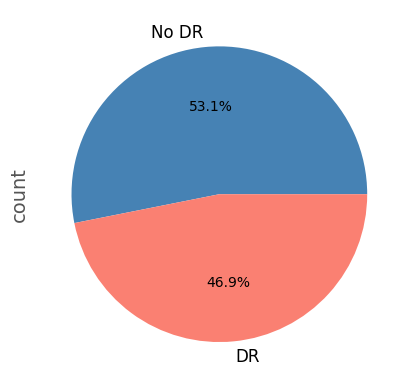

In [53]:
y.value_counts().plot(kind="pie", labels=['No DR','DR'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 
plt.show()

Now, we should convert the objects `X` and `y` to `numpy` objects.

In [54]:
X = X.values
y = y.values

## Specific task:
We will start with splitting our data to training and testing set and we keep tracking the shuffled indices. Furthermore, we will define a technical function for choosing an adequate solver for different penalties of `LogisticRegression` class.

In [55]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10, stratify=y)

In [56]:
def check_penalty(penalty='none'):
    if penalty == 'l1':
        solver='liblinear'
    if penalty == 'l2' or penalty == 'none':
        solver='lbfgs'
    return solver

Now we will split the **training set** into training and validation.

In [57]:
x_train_orig, x_val_orig, y_train, y_val= train_test_split(X_train, Y_train, test_size = 0.20, random_state = 10, stratify=Y_train)

Once splitted, scale your training set and validation set and name them `x_train` and `x_val` respectively. Notice that scaling is applied only **after** splitting in order to avoid information leakage. Train a *logistic regression* model with no regularization and then apply the trained model upon the validation set. Set `random_state` to be 5 and use the given `max_iter`. Compare their loss values. Use the imported `log_loss` function. Notice what are the inputs of this function.

In [ ]:
#C1
scaler = StandardScaler()
solver = check_penalty(penalty='none')
#----------------------Implement your code here:------------------------------
# Fit the scaler only on the training data and transform it
x_train = scaler.fit_transform(x_train_orig)

# Transform the validation data using the same scaler
x_val = scaler.transform(x_val_orig)

model = LogisticRegression(
    penalty=None,       # No regularization
    random_state=5,       # For reproducibility
    max_iter=max_iter         # Just to make sure it converges
)
model.fit(x_train, y_train)
y_train_proba = model.predict_proba(x_train)
y_val_proba = model.predict_proba(x_val)

log_loss_train = log_loss(y_train, y_train_proba[:, 1])
log_loss_val = log_loss(y_val, y_val_proba[:, 1])

print(f"Train log loss: {log_loss_train:.4f}")
print(f"Validation log loss: {log_loss_val:.4f}")

#-----------------------------------------------------------------------------

Train log loss: 0.6442
Validation log loss: 0.6757


### Expected output:
<center><img src="outputs/1.PNG" width="380"><center>

Now we would like to check $l_2$ regularization effect on a coarse scale. Calculate and plot the loss over training and testing sets along given `lmbda`. $\lambda$ axis is scaled by the logarithm with base of 10 when plotted. Notice what the argument `C` of `LogisticRegression` expects to recieve.

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Hung\AppData\Local\Temp\ipykernel_18008\556036967.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_{10}(\lambda)$')


processed: 8/8: 100%|██████████| 8/8 [00:00<00:00, 104.91it/s]


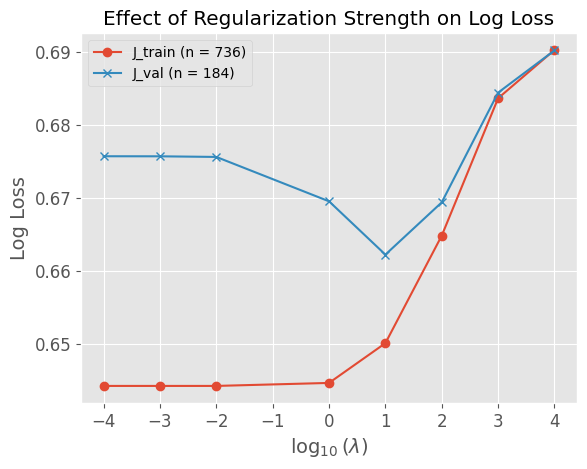

In [64]:
#C2
lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
pen = 'l2'
solver = check_penalty(penalty=pen)
J_train = np.zeros_like(lmbda)
J_val = np.zeros_like(lmbda)


with tqdm(total=len(lmbda), file=sys.stdout) as pbar:
    for idx, lb in enumerate(lmbda):
        pbar.set_description('processed: %d/%d' % ((1 + idx), len(lmbda)))
        pbar.update(1)

        model = LogisticRegression(
            penalty=pen,
            C=1/lb,
            solver=solver,
            random_state=5,
            max_iter=max_iter
        )
        model.fit(x_train, y_train)

        # Predict probabilities
        y_train_prob = model.predict_proba(x_train)
        y_val_prob = model.predict_proba(x_val)

        # Compute log loss
        J_train[idx] = log_loss(y_train, y_train_prob)
        J_val[idx] = log_loss(y_val, y_val_prob)

# Plot
plt.plot(np.log10(lmbda), J_train, marker='o')
plt.plot(np.log10(lmbda), J_val, marker='x')
plt.xlabel('$\log_{10}(\lambda)$')
plt.ylabel('Log Loss')
plt.legend(['J_train (n = ' + str(x_train.shape[0]) + ')', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
plt.title('Effect of Regularization Strength on Log Loss')
plt.grid(True)
plt.show()

### Expected output:
<center><img src="outputs/2.PNG" width="380"><center>

What can you tell? Will regularization have any effect?

Let's tune our regularization range according to the results above but still include $\lambda$=0 in order to include no regularization option.

<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Hung\AppData\Local\Temp\ipykernel_18008\3086153978.py:33: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


processed: 10/10: 100%|██████████| 10/10 [00:00<00:00, 91.59it/s]


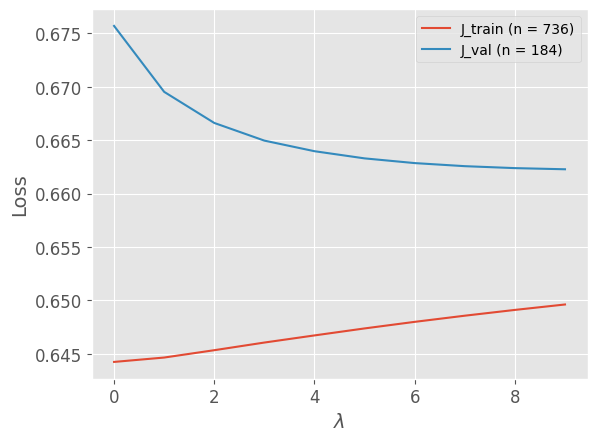

In [65]:
#C3
fine_lmbda = np.arange(0,10,1, dtype=np.float64)
J_train = np.zeros_like(fine_lmbda)
J_val = np.zeros_like(fine_lmbda)
with tqdm(total=len(fine_lmbda), file=sys.stdout) as pbar:
    for idx, lb in enumerate(fine_lmbda):
        pbar.set_description('processed: %d/%d' % ((1 + idx), len(fine_lmbda)))
        pbar.update(1)
        if lb-0.01 < 0:
            C = np.inf # equivalent to 'none' penalty
        else:
            C = 1/lb
        #----------------------Implement your code here:------------------------------
        model = LogisticRegression(
        penalty='l2',
        C=C,                     # From above: either np.inf (λ=0) or 1/λ
        solver='lbfgs',          # Works with L2
        random_state=5,
        max_iter=1000
        )
        model.fit(x_train, y_train)

        # Predict probabilities for loss calculation
        y_train_prob = model.predict_proba(x_train)
        y_val_prob = model.predict_proba(x_val)

        # Compute log loss
        J_train[idx] = log_loss(y_train, y_train_prob)
        J_val[idx] = log_loss(y_val, y_val_prob)
        #-----------------------------------------------------------------------------
plt.plot(fine_lmbda, J_train)
plt.plot(fine_lmbda, J_val)
plt.xlabel('$\lambda$')
plt.ylabel('Loss')
# plt.ylim(0.62, 0.68)
plt.legend(['J_train (n = ' + str(x_train.shape[0]) + ')', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
plt.show()

### Expected output:
<center><img src="outputs/3.PNG" width="380"><center>

An important technical point to consider: Try to run the same code you implemented but **without** declaring `dtype=np.float64` in `fine_lambda`. What is the result now? Why do you think it happened? After a quick discussion run the cell again **with** declaring `dtype=np.float64` and move on to the next part.

Now we would like to plot our *learning curve* to find out if we should have had more data. First choose the best $\lambda$ value. Then, in each iteration, train your model on an increasing training data data set and apply the model on `x_val`. Set `random_state` in `train_test_split` and don't forget to use stratification. Think what should be the `test_size` in each iteration w.r.t `curr_ratio`.

In [61]:
# choose best lmbda
best_lmbda = 10

processed: 100/100: : 100it [00:00, 117.73it/s]                     


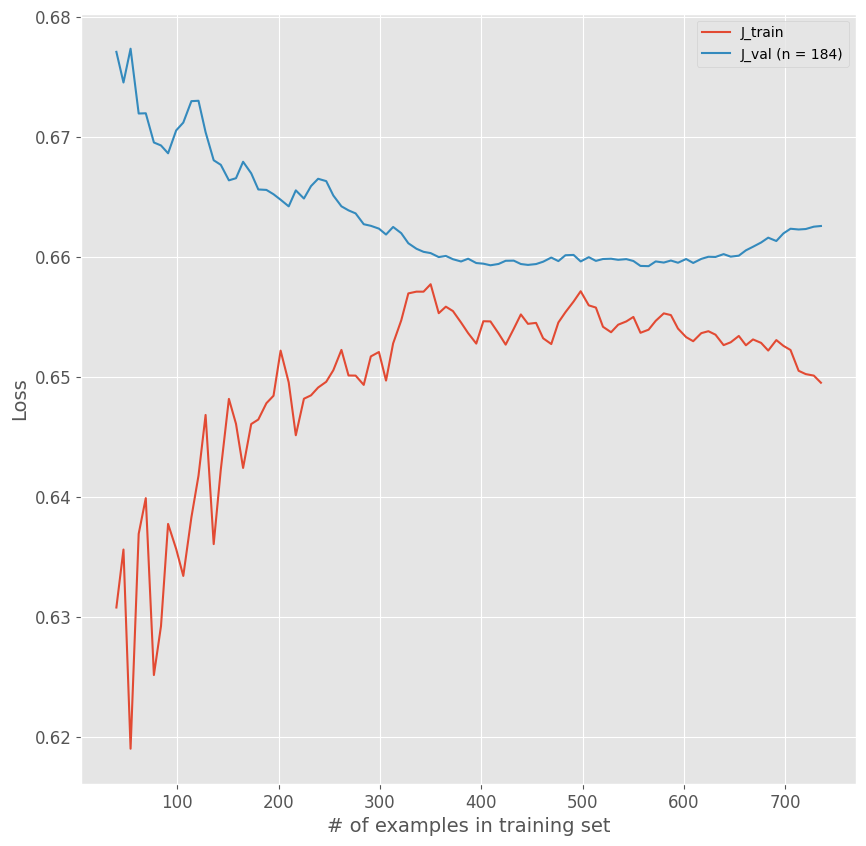

In [66]:
#C4
data_ratio = np.linspace(0.0028,0.998,num = 100)
J_train = np.zeros_like(data_ratio)
J_val = np.zeros_like(data_ratio)
log_reg = LogisticRegression(random_state=5, penalty=pen, C = 1/best_lmbda, max_iter=max_iter,solver=solver)
with tqdm(total=len(data_ratio)-1, file=sys.stdout) as pbar:
    for idx, curr_ratio in enumerate(data_ratio):
        pbar.set_description('processed: %d/%d' % ((1 + idx), len(data_ratio)))
        pbar.update(1)
        #----------------------Implement your code here:------------------------------
            # Split the data with the current training ratio
        x_tr_part, _, y_tr_part, _ = train_test_split(
            x_train, y_train, 
            train_size=curr_ratio, 
            stratify=y_train, 
            random_state=5
        )
        
        # Train on current portion
        log_reg.fit(x_tr_part, y_tr_part)

        # Predict probabilities
        y_tr_prob = log_reg.predict_proba(x_tr_part)
        y_val_prob = log_reg.predict_proba(x_val)

        # Calculate log loss
        J_train[idx] = log_loss(y_tr_part, y_tr_prob)
        J_val[idx] = log_loss(y_val, y_val_prob)

        #-----------------------------------------------------------------------------
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.plot(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[5:])
axes.plot(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[5:])
axes.set_xlabel('# of examples in training set')
axes.set_ylabel('Loss')
axes.legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

### Expected output:
<center><img src="outputs/4.PNG" width="380"><center>

---
<span style="color:red">***Question:***</span> *What are your conclusions? Would more data help us? In addition, what is the term that we use in order to describe the left side of the plot?*

---

We will now use *K-fold cross validation* to have more robustic conclusions. Our plots are basically the errorbars of the loss for every $\lambda$ where the standard deviation is used as the error. **Pay close attention to which data is used in** `skf.split`.

<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Hung\AppData\Local\Temp\ipykernel_18008\2303440650.py:51: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_{10}\lambda$')


8/8 lambda values, processed folds: 100%|██████████| 10/10 [00:00<00:00, 119.91it/s]


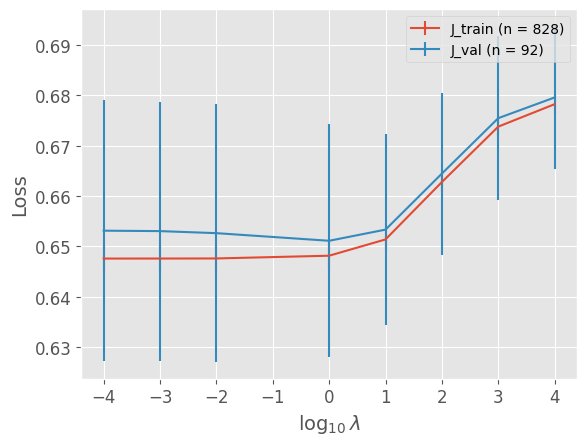

In [67]:
# We will now use *K-fold cross validation* to have more robustic conclusions. Our plots are basically the errorbars of the loss for every $\lambda$ where the standard deviation is used as the error. **Pay close attention to which data is used in** `skf.split`.
#C5
lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
# fine_lmbda = np.linspace(0.1,5,num=20) # after seeing cross-fold on logscale
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

# pen = 'l2'
solver = check_penalty(penalty=pen)

for idx, lmb in enumerate(lmbda):
    C = 1 / lmb
    with tqdm(total=n_splits, file=sys.stdout, position=0, leave=True) as pbar:
        h = 0
        J_train_fold = np.zeros(n_splits)
        J_val_fold = np.zeros(n_splits)

        for train_index, val_index in skf.split(X_train, Y_train):
            pbar.set_description('%d/%d lambda values, processed folds' % ((1 + idx), len(lmbda)))
            pbar.update()

            # ----- Fold training/validation split -----
            x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = Y_train[train_index], Y_train[val_index]

            # ----- Train model -----
            log_reg = LogisticRegression(random_state=5, penalty=pen, C=C, max_iter=max_iter, solver=solver)
            log_reg.fit(x_train_fold, y_train_fold)

            # ----- Predict probabilities -----
            y_tr_prob = log_reg.predict_proba(x_train_fold)
            y_val_prob = log_reg.predict_proba(x_val_fold)

            # ----- Compute losses -----
            J_train_fold[h] = log_loss(y_train_fold, y_tr_prob)
            J_val_fold[h] = log_loss(y_val_fold, y_val_prob)
            h += 1

        # ----- Aggregate mean and std of losses -----
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

# ----- Plotting -----
plt.errorbar(np.log10(lmbda), J_train[0, :], yerr=J_train[1, :])
plt.errorbar(np.log10(lmbda), J_val[0, :], yerr=J_val[1, :]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend([
    'J_train (n = ' + str(x_train_fold.shape[0]) + ')',
    'J_val (n = ' + str(x_val_fold.shape[0]) + ')'
])

### Expected output:
<center><img src="outputs/5.PNG" width="380"><center>

We would assume that we would have the same results for a finer range and thus we will choose our best $\lambda$ to be the same again.\
`max_data_ratio` is a function that returns the maximal range of number of examples to train on according to the number of folds (`n_splits`).

In [68]:
def max_data_ratio(n_splits,x_train,y_train):
    data_ratio_orig = np.linspace(0.01,0.98,num=100) 
    k_min = 0
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_min], random_state = 10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5,:].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5,:].shape[0] <= n_splits):
        k_min += 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_min], random_state = 10,
                                 stratify=y_train)  
    k_max = 99
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_max], random_state = 10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5,:].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5,:].shape[0] <= n_splits):
        k_max -= 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_max], random_state = 10,
                                 stratify=y_train)
    return np.linspace(data_ratio_orig[k_min],data_ratio_orig[k_max],num=100)

Plot the learinig curve using k-fold cross validation. **Pay close attention to your inputs in** `train_test_split`.

In [ ]:
# Plot the learinig curve using k-fold cross validation. **Pay close attention to your inputs in** `train_test_split`.
#C6
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
data_ratio = max_data_ratio(n_splits,X_train, Y_train)

J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

pen = 'l2'
solver = check_penalty(penalty=pen)
lmb = best_lmbda
lmb = 10
for idx, curr_ratio in enumerate(data_ratio):
    #--------------------------Impelment your code here:-------------------------------------

    #----------------------------------------------------------------------------------------
    with tqdm(total=n_splits, file=sys.stdout, position=0, leave=True) as pbar:
        h = 0
        J_train_fold = np.zeros(n_splits)
        J_val_fold = np.zeros(n_splits)
        m_x_train, _, m_y_train, _ = train_test_split(x_train_orig, y_train, test_size =1-curr_ratio, random_state = 10,
                                             stratify=y_train)
        for train_index, val_index in skf.split(m_x_train, m_y_train):
            pbar.set_description('Dataset fraction is %.1f, processed folds' % curr_ratio)
            pbar.update()
            #--------------------------Impelment your code here:-------------------------------------
         
            #----------------------------------------------------------------------------------------
            h += 1
        #--------------------------Impelment your code here:-------------------------------------

        #----------------------------------------------------------------------------------------
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes.errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes.set_xlabel('# of examples in training set')
axes.set_ylabel('Loss')
axes.legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

### Expected output:
<center><img src="outputs/6.PNG" width="380"><center>

Finally, after we chose our hyperparameter(s), we can test our model performances! You should train your chosen model over the **whole training set** and report the performance upon the testing set. Don't forget to scale as needed. Name your scaled training and testing sets as `x_tr` and `x_tst`.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
log_reg = LogisticRegression(random_state=5, penalty=pen, C = 1/best_lmbda, max_iter=max_iter,solver=solver)
x_tr = scaler.fit_transform(X_train)
x_tst = scaler.transform(x_test)
log_reg.fit(x_tr, Y_train)
y_pred_test = log_reg.predict(x_tst)
y_pred_proba_test = log_reg.predict_proba(x_tst)
plot_confusion_matrix(log_reg, x_tst, y_test, cmap=plt.cm.Blues)
plt.grid(False)

In [ ]:
from sklearn.metrics import confusion_matrix
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

Report the performances mentioned above (except AUROC for now):

In [ ]:
#C7
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
#--------------------------Impelment your code here:-------------------------------------

#-----------------------------------------------------------------------------------------
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

### Expected output:
<center><img src="outputs/7.PNG" width="380"><center>

As you can see, the performances are really bad. It is just slightly better than flipping a coin. 

---
<span style="color:red">***Question:***</span> *What are the possible reasons for that?*

---

In [ ]:
from sklearn.model_selection import GridSearchCV
solver = 'liblinear'
log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver=solver)
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
clf.fit(X_train, Y_train)
clf.best_params_

In [ ]:
def plot_radar(clf,params,clf_type):
    labels=np.array(['Accuracy', 'F1', 'PPV', 'Sensitivity', 'AUROC']) 
    score_mat_train = np.stack((clf.cv_results_['mean_train_accuracy'], clf.cv_results_['mean_train_f1'],
                               clf.cv_results_['mean_train_precision'], clf.cv_results_['mean_train_recall'],
                               clf.cv_results_['mean_train_roc_auc']), axis=0)
    score_mat_val = np.stack((clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'],
                               clf.cv_results_['mean_test_precision'], clf.cv_results_['mean_test_recall'],
                               clf.cv_results_['mean_test_roc_auc']), axis=0)


    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot

    angles=np.concatenate((angles,[angles[0]]))
    cv_dict = clf.cv_results_['params']
    # cv_dict = sorted(cv_dict, key=lambda k: k['logistic__penalty'])  # arrange dictionaries by penalties
    fig=plt.figure(figsize=(18,14))
    for idx, loc in enumerate(cv_dict):
        ax = fig.add_subplot(1, len(lmbda), 1+idx, polar=True)
        stats_train = score_mat_train[:, idx]
        stats_train=np.concatenate((stats_train,[stats_train[0]]))
        ax.plot(angles, stats_train, 'o-', linewidth=2)
        ax.fill(angles, stats_train, alpha=0.25)
        stats_val = score_mat_val[:, idx]
        stats_val=np.concatenate((stats_val,[stats_val[0]]))
        ax.plot(angles, stats_val, 'o-', linewidth=2)
        ax.fill(angles, stats_val, alpha=0.25)
        ax.set_thetagrids(angles[0:-1] * 180/np.pi, labels) #angles[0:-1]
        if idx == 0:
            ax.set_ylabel('$L_2$', fontsize=18)
        if cv_dict[idx]['logistic__C'] <= 1:
            ax.set_title('$\lambda$ = %d'  % (1 / cv_dict[idx]['logistic__C']))
        else:
            ax.set_title('$\lambda$ = %.3f' % (1 / cv_dict[idx]['logistic__C']))
        ax.set_ylim([0,1])
        ax.legend(['Train','Validation'])
        ax.grid(True)
    plt.show()



Next, we will plot a *radar plot* in order to visualize the performances. Repeat C7 and in addtion plot the confusion matrix.

In [ ]:
#C8
params = ['C', 'penalty']
clf_type = 'log_reg'
plot_radar(clf,params,clf_type)
chosen_clf = clf.best_estimator_
# print(chosen_clf)
y_pred_test = chosen_clf.predict(x_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = chosen_clf.predict_proba(x_test)
#--------------------------Impelment your code here:-------------------------------------

#------------------------------------------------------------------------------------------
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

### Expected output:
<center><img src="outputs/8.PNG" width="550"><center>

---
<span style="color:red">***Question:***</span> *Try to rerun `GridSearchCV` using a different penalty. Did you get any different results?*

---

Finally, we would like to save the best model ($l_2$ regularization) in order to compare its' performances with other classifiers in the next tutorial.

In [ ]:
if not("results" in os.listdir()):
    os.mkdir("results")
with open('results/best_lin.pkl', 'wb') as f: 
    pickle.dump(chosen_clf, f)

Images credit:
* [Classification regularization](https://medium.com/ml-research-lab/under-fitting-over-fitting-and-its-solution-dc6191e34250)
* [Regression regularization](https://www.quora.com/What-is-regularization-in-machine-learning)
* Geometrical interpretation: From Bishop s Pattern recognition and machine learning, Figure 3.4.
* [Diabetic-Retinopathy](https://2020vision4nh.org/diabetic-retinopathy/)
* [Real diabetic retina](https://www.reviewofoptometry.com/article/my-patient-has-diabetic-retinopathynow-what)
* [Fitting](http://madrury.github.io/smoothers/)
* [Kfolds](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html)
* [Summary](http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/08_CV_Ensembling/08_CV_Ensembling.html)
* [AUROC](https://www.researchgate.net/figure/Receiver-Operating-Characteristic-ROC-curves-and-the-area-under-ROC-curve-or-AUC_fig3_331797273)


#### *This tutorial was written by [Moran Davoodi](mailto:morandavoodi@gmail.com) with the assitance of [Yuval Ben Sason](mailto:yuvalbse@gmail.com) & Kevin Kotzen*